# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# Data collection

***Data import***

In [2]:
data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').drop('Unnamed: 0',axis=1)

In [3]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


***Columns description***

In [4]:
data.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

In [5]:
data.shape

(16744, 16)

| Variable        | Definition                                | Key           |
|-----------------|-------------------------------------------|---------------|
| ID              | Unique movie ID                           |               |
| Title           | Title of the movie                        |               |
| Year            | Year when the movie was produced          |               |
| Age             | Target age group                          |               |
| IMDb            | IMDb rating                               |               |
| Rotten Tomatoes | Rotten Tomatoes %                         |               |
| Netflix         | Whether the movie is found on Netflix     | 1: Yes, 0: No |
| Hulu            | Whether the movie is found on Hulu        | 1: Yes, 0: No |
| Prime Video     | Whether the movie is found on Prime Video | 1: Yes, 0: No |
| Disney+         | Whether the movie is found on Disney+     | 1: Yes, 0: No |
| Type            | Movie or TV series                        |               |
| Directors       | Directors of the movie                    |               |
| Genres          | Genres of the movie                       |               |
| Country         | Country where the movie was produced      |               |
| Language        | Languages available for the movie         |               |
| Runtime         | Length of the movie                       |               |

# Data cleaning

***Describe the data***

In [6]:
data.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


***Check for null values***

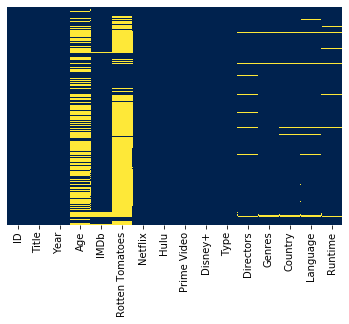

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

This dataset is quite large with more than 16k entries. The objective here is to perform EDA and find interesting insights. I might also try later to predict the rating of a movie. If we decide to drop some rows with missing values, it won't have too much impact on the outcomes. Let's have a look at the 'Age' and 'Rotten Tomatoes' features as they seem to have a lot of missing values.

In [8]:
print("{0:.0%}".format(data['Age'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Age' feature.")

56% of missing values in the 'Age' feature.


In [9]:
print("{0:.0%}".format(data['Rotten Tomatoes'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Rotten Tomatoes' feature.")

69% of missing values in the 'Rotten Tomatoes' feature.


In [10]:
print("{0:.0%}".format(data['IMDb'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'IMDb' feature.")

3% of missing values in the 'IMDb' feature.


I will remove the 'Age' feature but I might come back to it later as there is still some insightful data available. I will drop the 'Rotten Tomatoes' feature as the 'IMDb' one can do the job for the prediction (only 3% of missing values). I will also drop the few rows on which we are missing some information like 'Directors', 'Genres' etc.

In [11]:
data_clean = data.drop(['Rotten Tomatoes','Age'],axis=1)

In [12]:
data_clean.dropna(inplace=True)

In [13]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


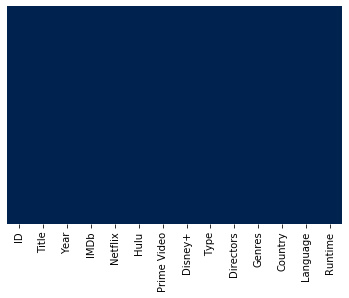

In [14]:
sns.heatmap(data_clean.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [15]:
print("We lost","{0:.0%}".format((data_clean.shape[0]-data.shape[0])/data.shape[0]),"of the initial dataset by removing null values.")

We lost -9% of the initial dataset by removing null values.


I believe this is ok, we can move forward with our cleaning.

***Deal with the 'Type' column***

In [16]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [17]:
data_clean['Type'].value_counts()

0    15233
Name: Type, dtype: int64

I noticed that the 'Type' feature should contain 1s and 0s to detect movies and TV series. Here this is not the case. I guess there is an issue with the dataset here. We will then remove this column.

In [18]:
data_clean.drop('Type',axis=1,inplace=True)

***Create additional columns***

In [19]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Let's take care of 'Directors', 'Genres', 'Country', and 'Language' which include several input. We will need to break down these features by creating additional columns.

As there will be a lot of additional columns, I will create new tables for 'Directors', 'Genres', 'Country' and 'Language'. I will then be able to merge them later depending on the analysis.

In [20]:
data_directors = data_clean['Directors'].apply(lambda x: x.split(','))
data_directors =pd.get_dummies(data_directors.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

In [21]:
data_genres = data_clean['Genres'].apply(lambda x: x.split(','))
data_genres =pd.get_dummies(data_genres.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

In [22]:
data_country = data_clean['Country'].apply(lambda x: x.split(','))
data_country =pd.get_dummies(data_country.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

In [23]:
data_language = data_clean['Language'].apply(lambda x: x.split(','))
data_language =pd.get_dummies(data_language.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

Now that our tables are created, we can remove the columns in 'data_clean'.

In [24]:
data_clean = data_clean.drop(['Directors','Genres','Country','Language'],axis=1)

The data cleaning is now performed, let's jump to the EDA!

# Exploratory Data Analysis (EDA)

In [25]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
0,1,Inception,2010,8.8,1,0,0,0,148.0
1,2,The Matrix,1999,8.7,1,0,0,0,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,161.0


Here are the questions I would like to answer in the analysis:
- What is the OTT platform with the most movies?
- What is the rating distribution on OTT platforms? (in general + split)
- How old are movies on OTT platforms? (in general + split)
- How long are movies on OTT platforms? (in general + split)

We will first answer these questions before merging the metadata and extending our analysis.

### ***What is the OTT platform with the most movies?***

In [26]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
0,1,Inception,2010,8.8,1,0,0,0,148.0
1,2,The Matrix,1999,8.7,1,0,0,0,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,161.0


In [27]:
OTT_movie_count = data_clean[['Netflix','Hulu','Prime Video','Disney+']].groupby(['Netflix','Hulu','Prime Video','Disney+'],as_index=False).sum().sum()

In [28]:
OTT_movie_count = pd.DataFrame(OTT_movie_count).reset_index()
OTT_movie_count.columns = ['Platform','Count']

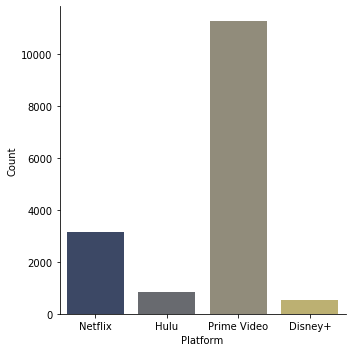

In [29]:
sns.catplot(x='Platform',y='Count',data=OTT_movie_count,kind='bar',palette='cividis')

Prime Video is the platform with the most content by far in this dataset.

### ***What is the rating distribution on OTT platforms?***

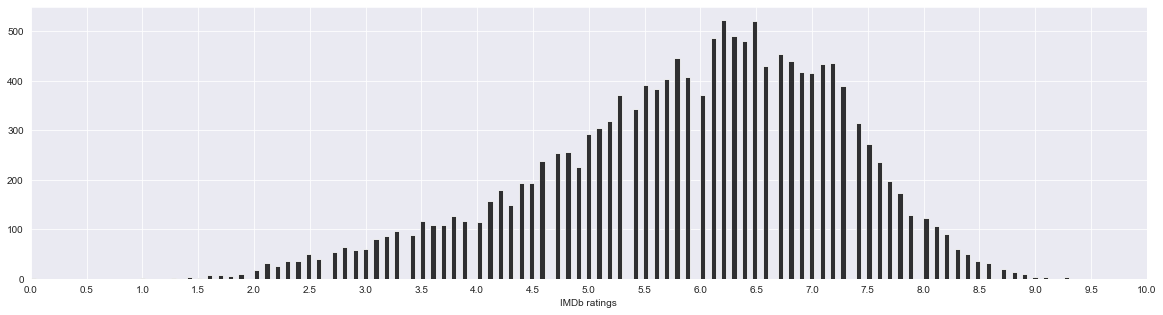

In [30]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean.IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [31]:
data_clean.IMDb.mean()

5.899579859515516

In [32]:
data_clean.IMDb.median()

6.1

We notice that this graph has a **bell-shaped curve**. Most ratings are between **6 and 6.5**. Let's have a look if this curve changes depending on the platform.

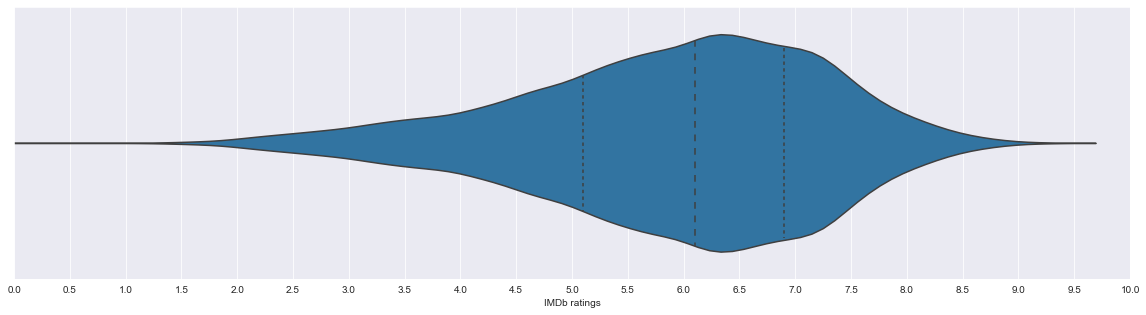

In [33]:
plt.figure(figsize=(20,5))
rating_violin = sns.violinplot(data_clean.IMDb,inner='quartile')
rating_violin.set(xlabel='IMDb ratings',xlim=(0,10))
rating_violin.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

**Netflix**

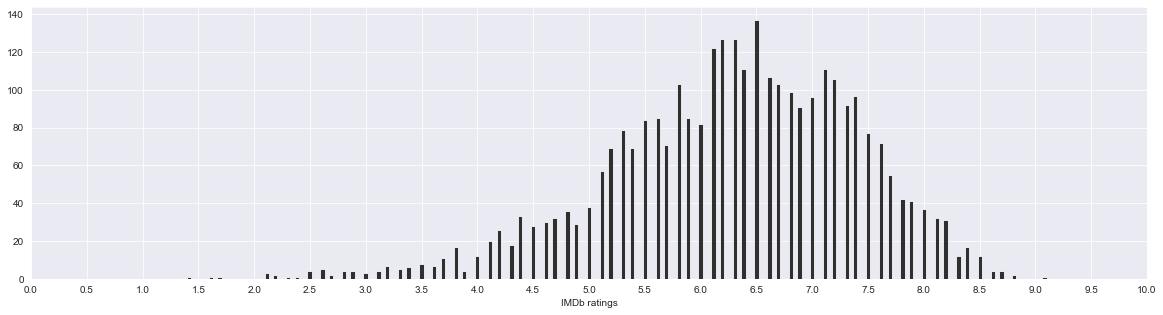

In [34]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [35]:
data_clean[data_clean['Netflix']==1].IMDb.mean()

6.2733819796954355

In [36]:
data_clean[data_clean['Netflix']==1].IMDb.median()

6.4

**Hulu**

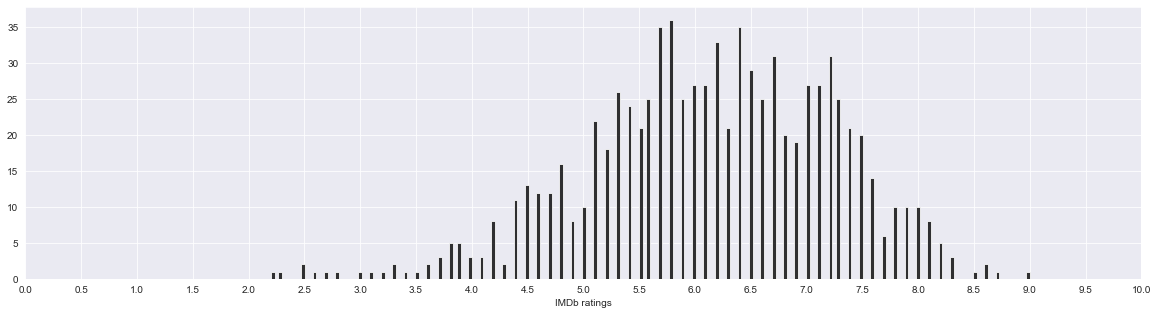

In [37]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [38]:
data_clean[data_clean['Hulu']==1].IMDb.mean()

6.136910377358489

In [39]:
data_clean[data_clean['Hulu']==1].IMDb.median()

6.2

**Prime Video**

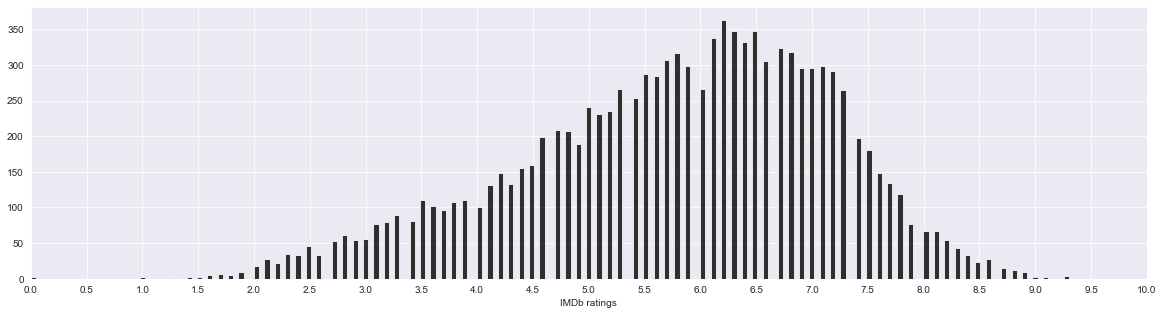

In [40]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [41]:
data_clean[data_clean['Prime Video']==1].IMDb.mean()

5.764115510674085

In [42]:
data_clean[data_clean['Prime Video']==1].IMDb.median()

5.9

**Disney+**

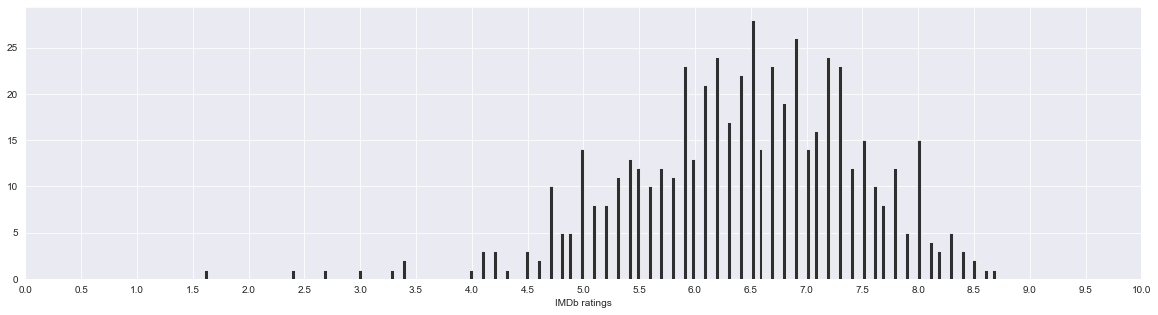

In [43]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [44]:
data_clean[data_clean['Disney+']==1].IMDb.mean()

6.428413284132837

In [45]:
data_clean[data_clean['Disney+']==1].IMDb.median()

6.5

Based on these graphs and data, it looks like on average that **Disney+ has more well-rated movies**.

### ***How old are movies on OTT platforms?***

In [46]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
0,1,Inception,2010,8.8,1,0,0,0,148.0
1,2,The Matrix,1999,8.7,1,0,0,0,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,161.0


In [47]:
data_clean['Year'].describe()

count    15233.000000
mean      2002.349964
std         21.021750
min       1902.000000
25%       1999.000000
50%       2011.000000
75%       2016.000000
max       2020.000000
Name: Year, dtype: float64

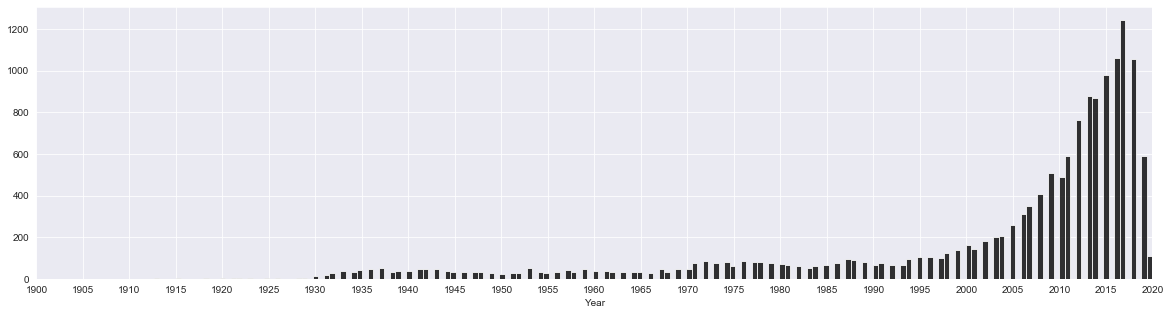

In [48]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean.Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

It is clear here that most movies on OTT platforms were produced **between 2010 and 2020**. Let's have a look if there is a difference between platforms.

**Netflix**

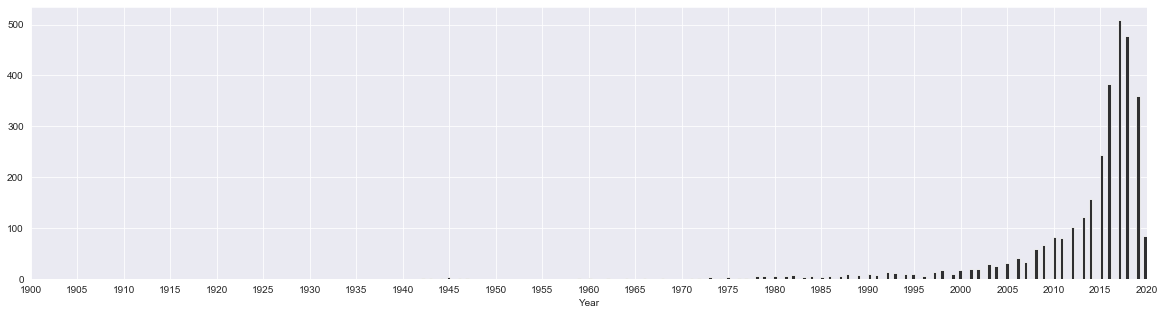

In [49]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [50]:
data_clean[data_clean['Netflix']==1].Year.mean()

2013.083121827411

In [51]:
data_clean[data_clean['Netflix']==1].Year.median()

2016.0

**Hulu**

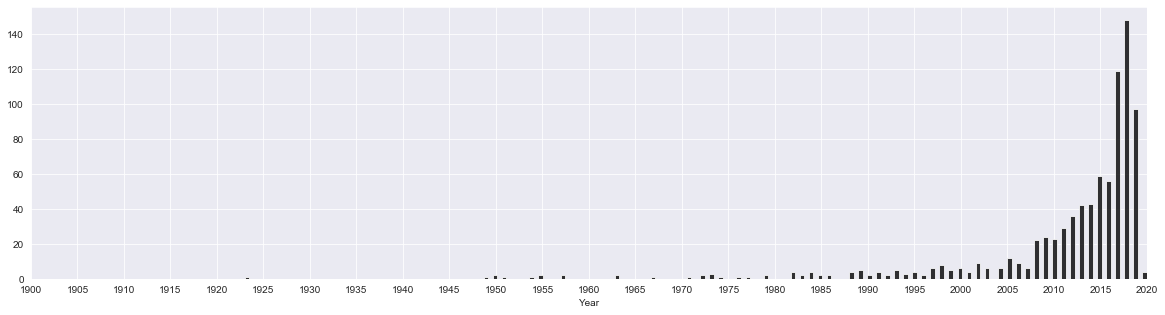

In [52]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [53]:
data_clean[data_clean['Hulu']==1].Year.mean()

2011.4646226415093

In [54]:
data_clean[data_clean['Hulu']==1].Year.median()

2015.5

**Prime Video**

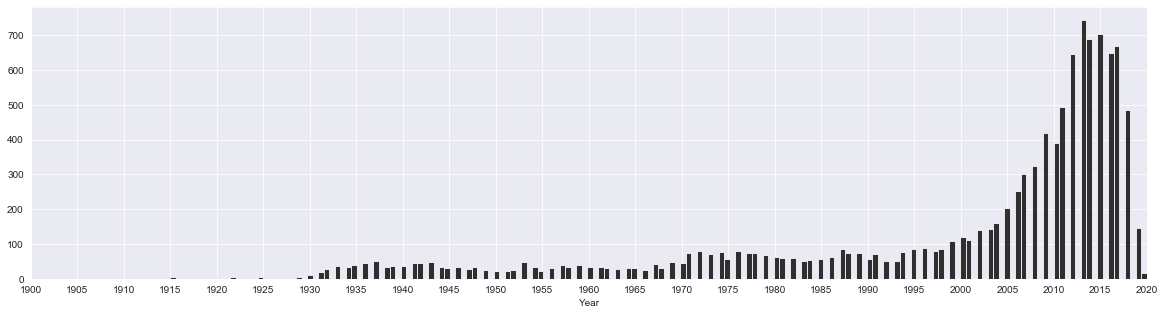

In [55]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [56]:
data_clean[data_clean['Prime Video']==1].Year.mean()

1999.1709628842236

In [57]:
data_clean[data_clean['Prime Video']==1].Year.median()

2009.0

**Disney+**

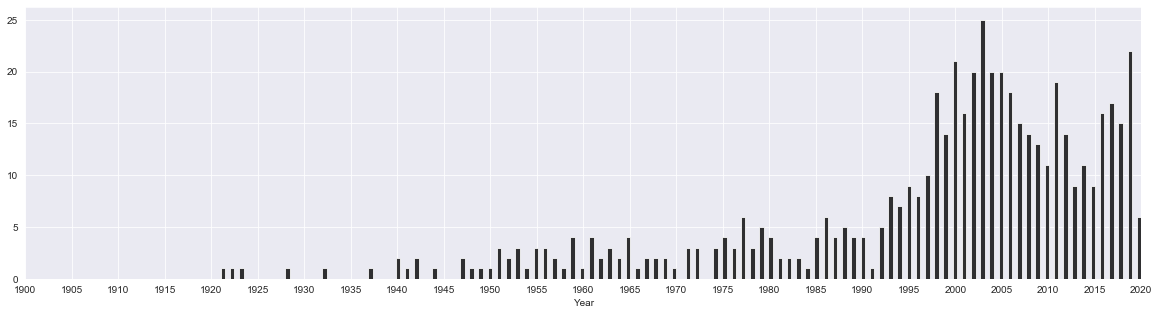

In [58]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [59]:
data_clean[data_clean['Disney+']==1].Year.mean()

1997.2952029520295

In [60]:
data_clean[data_clean['Disney+']==1].Year.median()

2003.0

Clearly here we have interesting insights:
- Looking at the medians, Disney+ has way more 'old' movies than the other platforms
- Netflix and Hulu seem to have the most recent content (produced after 2016)
- Prime Video and Disney+ are the most balanced ones with old and new content

Let's push the analysis further and check if there is a link between the year of production of a movie and the ratings.

In [61]:
mean_rating_per_year = data_clean[['Year','IMDb']].groupby('Year',as_index=False).mean()

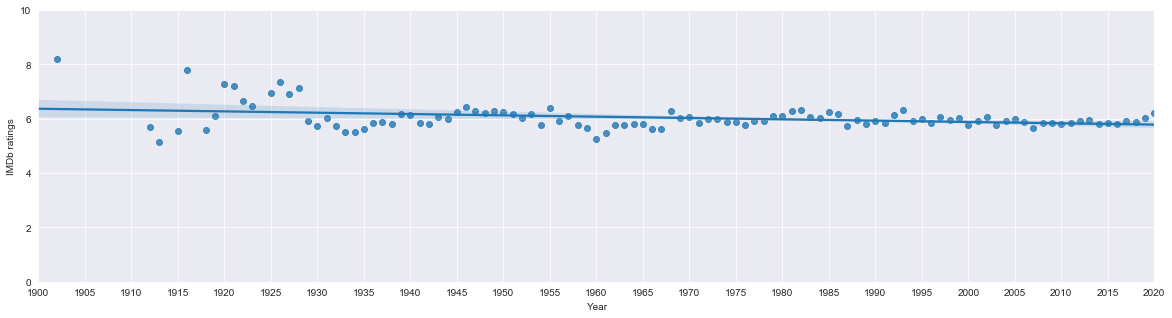

In [62]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_mean = sns.regplot(x=mean_rating_per_year.Year,y=mean_rating_per_year.IMDb)
rating_mean.set(xlabel='Year',xlim=(1900,2020),ylabel='IMDb ratings',ylim=(0,10))
rating_mean.xaxis.set_major_locator(ticker.MultipleLocator(5))

It looks like there is a small **declining trend** over the years.

### ***How long are movies on OTT platforms?***

In [63]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
0,1,Inception,2010,8.8,1,0,0,0,148.0
1,2,The Matrix,1999,8.7,1,0,0,0,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,161.0


In [64]:
data_clean['Runtime'].describe()

count    15233.000000
mean        94.478960
std         24.343577
min          1.000000
25%         84.000000
50%         92.000000
75%        105.000000
max        328.000000
Name: Runtime, dtype: float64

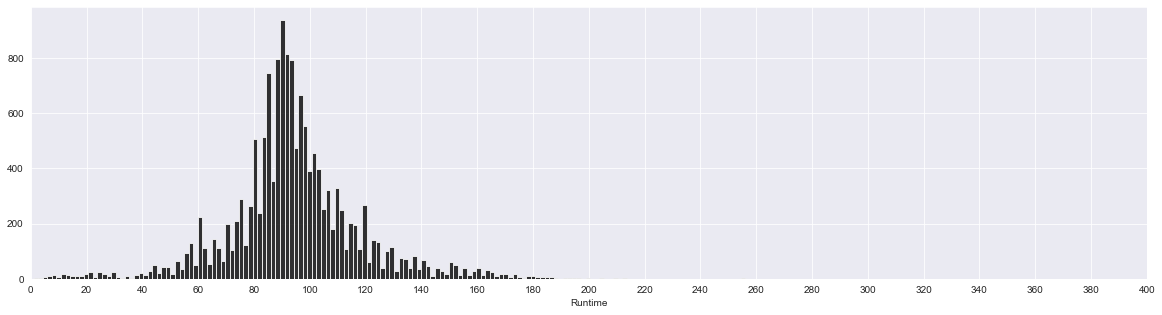

In [65]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean.Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

It is not surprising to see that **movies tend to last on average 1h30**.

**Netflix**

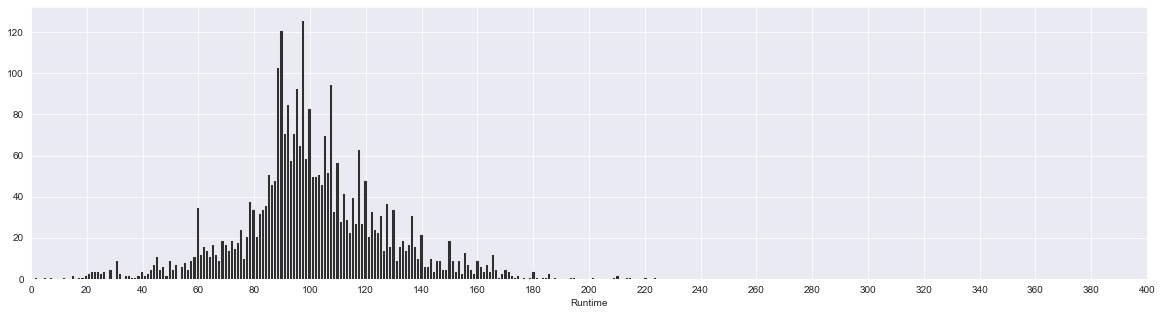

In [66]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [67]:
data_clean[data_clean['Netflix']==1].Runtime.mean()

100.6855964467005

In [68]:
data_clean[data_clean['Netflix']==1].Runtime.median()

98.0

**Hulu**

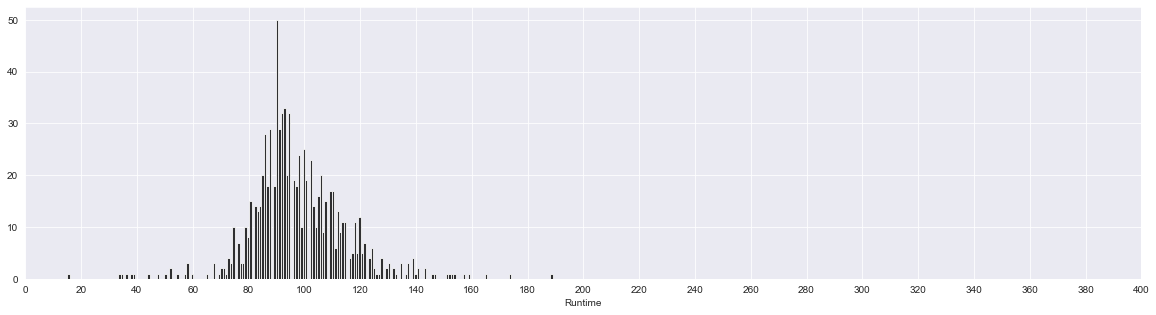

In [69]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [70]:
data_clean[data_clean['Hulu']==1].Runtime.mean()

97.53891509433963

In [71]:
data_clean[data_clean['Hulu']==1].Runtime.median()

95.0

**Prime Video**

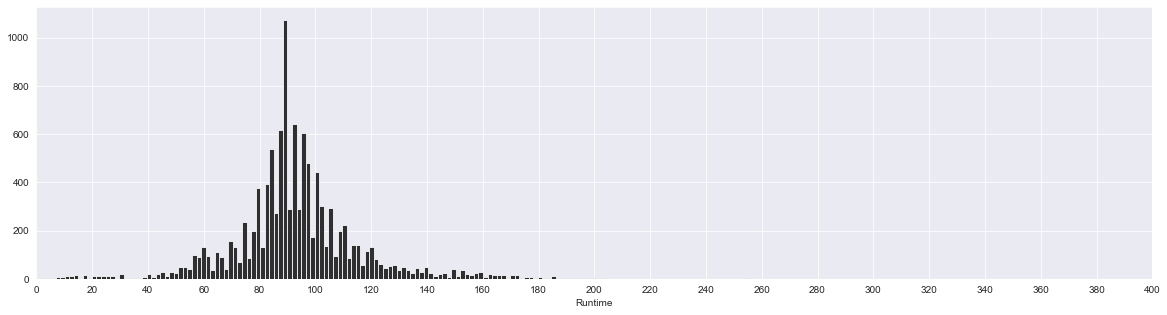

In [72]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [73]:
data_clean[data_clean['Prime Video']==1].Runtime.mean()

93.18398440960227

In [74]:
data_clean[data_clean['Prime Video']==1].Runtime.median()

91.0

**Disney+**

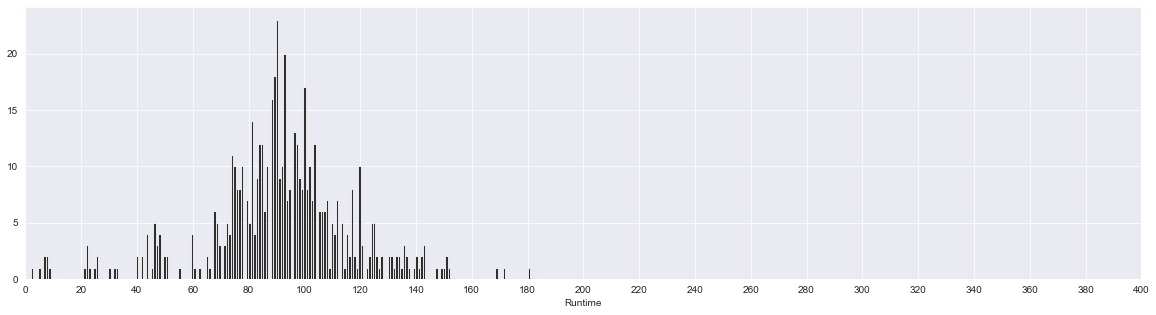

In [75]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [76]:
data_clean[data_clean['Disney+']==1].Runtime.mean()

91.5239852398524

In [77]:
data_clean[data_clean['Disney+']==1].Runtime.median()

91.5

Netflix movies tend to be **longer** on average than other OTT platforms.

Let's try to push the analysis further and answer more sophisticated questions:
- What is the top genre per platform?
- What is the top genre per country?
- What is the top genre per year?
- What is the genre with the highest average rating?
- Who is the most well-rated director?
- Which is the biggest country of movie production?
- Which country has the highest average rating?

### ***What is the top genre per platform?***

In [78]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
0,1,Inception,2010,8.8,1,0,0,0,148.0
1,2,The Matrix,1999,8.7,1,0,0,0,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,161.0


In [79]:
data_genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,News,Talk-Show
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
top_genre = data_clean[['Netflix','Hulu','Prime Video','Disney+']].join(data_genres)

In [81]:
top_genre.head()

,Netflix,Hulu,Prime Video,Disney+,Action,Adventure,Animation,Biography,Comedy,Crime,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,News,Talk-Show
0,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Netflix**

In [82]:
top_genre_netflix = top_genre.drop(['Hulu', 'Prime Video', 'Disney+'],axis=1).groupby(['Netflix']).sum().iloc[1]
top_genre_netflix = pd.DataFrame(top_genre_netflix).sort_values(1,ascending=False)
top_genre_netflix = top_genre_netflix.transpose()

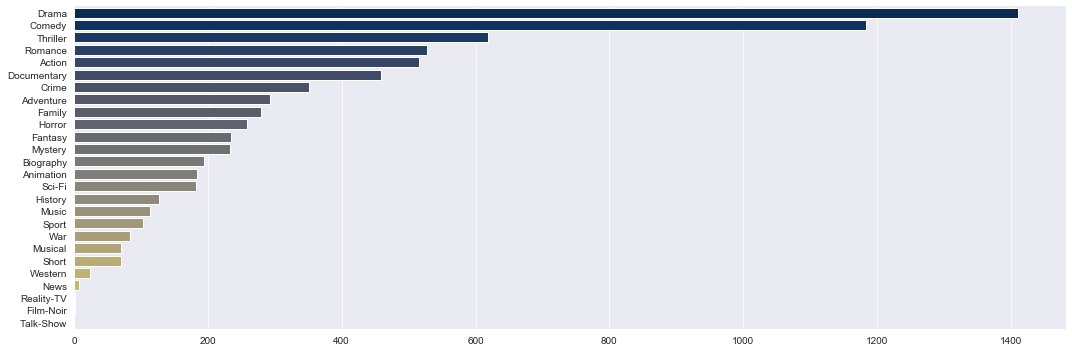

In [83]:
sns.catplot(data=top_genre_netflix,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Netflix** are: **Drama, Comedy, Thriller, Romance and Action**.

**Hulu**

In [84]:
top_genre_hulu = top_genre.drop(['Netflix', 'Prime Video', 'Disney+'],axis=1).groupby(['Hulu']).sum().iloc[1]
top_genre_hulu = pd.DataFrame(top_genre_hulu).sort_values(1,ascending=False)
top_genre_hulu = top_genre_hulu.transpose()

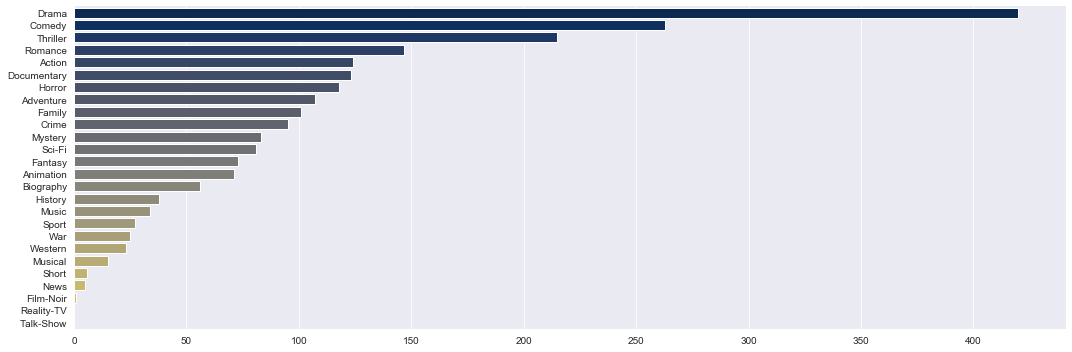

In [85]:
sns.catplot(data=top_genre_hulu,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Hulu** are: **Drama, Comedy, Thriller, Romance and Action**.

**Prime Video**

In [86]:
top_genre_prime = top_genre.drop(['Netflix', 'Hulu', 'Disney+'],axis=1).groupby(['Prime Video']).sum().iloc[1]
top_genre_prime = pd.DataFrame(top_genre_prime).sort_values(1,ascending=False)
top_genre_prime = top_genre_prime.transpose()

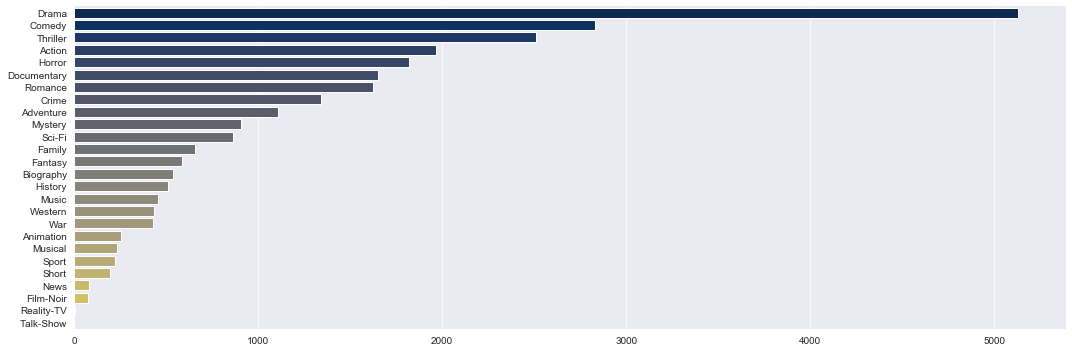

In [87]:
sns.catplot(data=top_genre_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Prime Video** are: **Drama, Comedy, Thriller, Action and Horror**.

**Disney+**

In [88]:
top_genre_disney = top_genre.drop(['Netflix', 'Hulu', 'Prime Video'],axis=1).groupby(['Disney+']).sum().iloc[1]
top_genre_disney = pd.DataFrame(top_genre_disney).sort_values(1,ascending=False)
top_genre_disney = top_genre_disney.transpose()

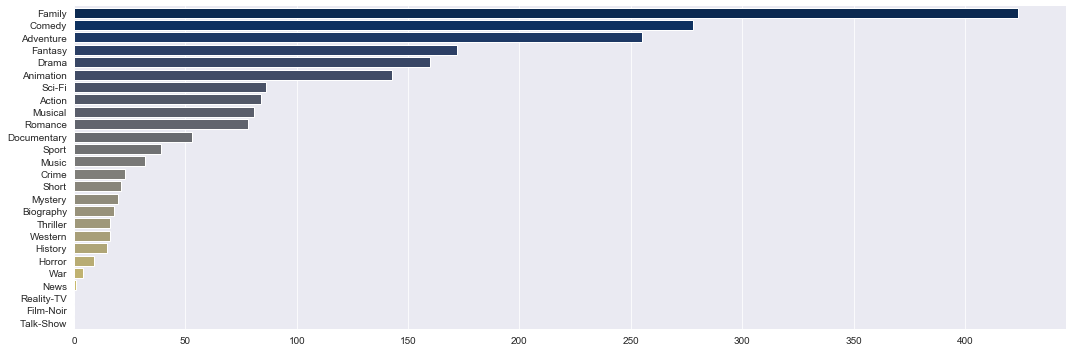

In [89]:
sns.catplot(data=top_genre_disney,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Disney+** are: **Family, Comedy, Adventure, Fantasy and Drama**.

Netflix and Hulu seem to have the same movie landscape as they share the same top 5 movie genres.

Prime Video has more Action and Horror movies than its competitors.

Disney+ stands out with a completely different landscape with more Family movies on its platform.

### ***What is the top genre per country?***

In [90]:
data_genres = data_genres.reset_index().drop('index',axis=1)

In [91]:
data_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,News,Talk-Show
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15228,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15229,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15230,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15231,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
data_country = data_country.reset_index().drop('index',axis=1)

In [93]:
data_country

,Afghanistan,Albania,Algeria,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Zimbabwe,Costa Rica,El Salvador,Swaziland,Macao,The Democratic Republic Of Congo,Moldova,Oman,Yemen,Laos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Creation of a database linking genre and country

#country_list = []
#genre_list = []
#value_list = [0]*(len(data_country.columns)*len(data_genres.columns))
#l = 0
#for i in range(0,len(data_country.columns)):
    #for j in range(0,len(data_genres.columns)):
        #country_list.append(data_country.columns[i])
        #genre_list.append(data_genres.columns[j])
        #for k in range(0,len(data_country)):
            #if data_country[data_country.columns[i]].loc[k]==1 and data_genres[data_genres.columns[j]].loc[k]==1:
                #value_list[l] = value_list[l]+1
        #j=j+1
        #l=l+1
    #i=i+1
#data_top_genre_country = {'Country':country_list,'Genre':genre_list,'Value':value_list}
#top_genre_country = pd.DataFrame(data_top_genre_country)

In [95]:
#top_genre_country.to_excel("top_genre_country.xlsx")

In [96]:
top_genre_country = pd.read_excel('top_genre_country.xlsx',usecols=[1,2,3])

In [97]:
top_genre_country

,Country,Genre,Value
0,Afghanistan,Action,1
1,Afghanistan,Adventure,0
2,Afghanistan,Animation,0
3,Afghanistan,Biography,0
4,Afghanistan,Comedy,0
...,...,...,...
4207,Laos,Thriller,0
4208,Laos,War,0
4209,Laos,Western,0
4210,Laos,News,1


In [106]:
top_genre_country_sorted = top_genre_country.sort_values(['Country','Value'],ascending=(True,False)).reset_index().drop('index',axis=1)

In [110]:
top_genre_country_sorted.head()

,Country,Genre,Value
0,Afghanistan,Documentary,3
1,Afghanistan,History,3
2,Afghanistan,War,3
3,Afghanistan,Action,1
4,Afghanistan,Drama,1


In [151]:
country_list = []
genre_list = []
value_list = []
for i in range(0,len(top_genre_country),26):
    country_list.append(top_genre_country_sorted['Country'].loc[i])
    genre_list.append(top_genre_country_sorted['Genre'].loc[i])
    value_list.append(top_genre_country_sorted['Value'].loc[i])
top_genre_country_final = pd.DataFrame({'Country':country_list,'Genre':genre_list,'Value':value_list})

In [152]:
top_genre_country_final

,Country,Genre,Value
0,Afghanistan,Documentary,3
1,Albania,Drama,4
2,Algeria,Drama,4
3,Angola,Documentary,1
4,Argentina,Drama,56
...,...,...,...
157,West Germany,Drama,24
158,Yemen,Adventure,1
159,Yugoslavia,Drama,9
160,Zambia,Drama,1


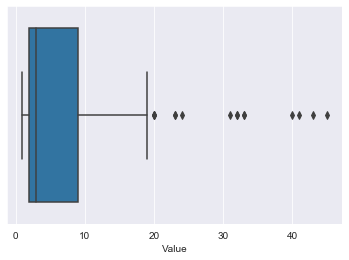

In [153]:
sns.boxplot(top_genre_country_final[top_genre_country_final['Value']<50]['Value'])

In [154]:
top_genre_country_final[top_genre_country_final['Value']>=4]

,Country,Genre,Value
1,Albania,Drama,4
2,Algeria,Drama,4
4,Argentina,Drama,56
7,Australia,Drama,158
8,Austria,Drama,20
...,...,...,...
153,United States,Drama,3981
154,Uruguay,Drama,12
155,Venezuela,Drama,4
157,West Germany,Drama,24


In [155]:
top_genre_country_final[top_genre_country_final['Value']>=4]['Genre'].value_counts()

Drama          72
Documentary    10
Comedy          4
Action          2
Mystery         1
Name: Genre, dtype: int64

In [156]:
ISO_country_codes = pd.read_excel('ISO codes.xlsx')

In [157]:
ISO_country_codes

,Country,2-digit code,3-digit code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20
...,...,...,...,...
244,Western Sahara,EH,ESH,732
245,Yemen,YE,YEM,887
246,Zambia,ZM,ZMB,894
247,Zimbabwe,ZW,ZWE,716


In [158]:
top_genre_country_final = top_genre_country_final.merge(ISO_country_codes[['Country','3-digit code']],on='Country')
top_genre_country_final

,Country,Genre,Value,3-digit code
0,Afghanistan,Documentary,3,AFG
1,Albania,Drama,4,ALB
2,Algeria,Drama,4,DZA
3,Angola,Documentary,1,AGO
4,Argentina,Drama,56,ARG
...,...,...,...,...
121,Ukraine,Drama,11,UKR
122,Uruguay,Drama,12,URY
123,Yemen,Adventure,1,YEM
124,Zambia,Drama,1,ZMB


In [159]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [160]:
init_notebook_mode(connected=True) 

In [162]:
data = dict(
        type = 'choropleth',
        locations = top_genre_country_final['3-digit code'],
        z = top_genre_country_final['Genre'],
        text = top_genre_country_final['Country']
      )

In [163]:
layout = dict(
    title = 'Top genre per country',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [164]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [165]:
data

{'type': 'choropleth', 'locations': 0      AFG
 1      ALB
 2      DZA
 3      AGO
 4      ARG
       ... 
 121    UKR
 122    URY
 123    YEM
 124    ZMB
 125    ZWE
 Name: 3-digit code, Length: 126, dtype: object, 'z': 0      Documentary
 1            Drama
 2            Drama
 3      Documentary
 4            Drama
           ...     
 121          Drama
 122          Drama
 123      Adventure
 124          Drama
 125    Documentary
 Name: Genre, Length: 126, dtype: object, 'text': 0      Afghanistan
 1          Albania
 2          Algeria
 3           Angola
 4        Argentina
           ...     
 121        Ukraine
 122        Uruguay
 123          Yemen
 124         Zambia
 125       Zimbabwe
 Name: Country, Length: 126, dtype: object}